In [200]:
import pandas as pd
import numpy as np
import sklearn as sk
import tsfresh as ts

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


<h3>Data Preparation:</h3>

<h4>Definition der Dataframes:</h4>

Einlesen der Dateien als Dataframes aufgeteilt nach verschiedenen Sensoren (Accelerometer, Gyroscope, Orientation, Gravity)

Datenaufzeichnung mit Aktivitäten des alltäglichen Lebens: -> Aufteilung in einen Dataframe mit Label "df_walk"
- Laufen
- Treppe hoch
- Treppe runter
- auf Stuhl setzen
- Ins Bett legen

Fallen: (-> Aufteilung in einen Dataframe mit Label "df_fall")
- aus dem Laufen stürzen
- aus dem Stehen stürzen
- aus dem Sitzen stürzen



In [201]:
df = []
#all_filenames = ["data/laufen_normal1.json", "data/treppe_hoch1.json", "data/treppe_runter1.json", "data/bett_setzen1.json", "data/hinsetzen1.json"]   
all_filenames = ["data/treppe_hochlaufen_Paul_v1.json",
"data/treppe_hochlaufen_Paul_v2.json",
"data/treppe_hochlaufen_Luca.json",
"data/treppe_runterlaufen_Paul_v1.json",
"data/treppe_runterlaufen_Paul_v2.json",
"data/treppe_runterlaufen_Luca.json",
"data/laufen_Paul_v1.json",
"data/laufen_Paul_v2.json",
"data/laufen_Luca.json",
"data/hinlegen_Paul_v1.json",
"data/hinlegen_Paul_v2.json",
"data/hinlegen_Luca.json",
"data/hinsetzen_Paul_v1.json",
"data/hinsetzen_Paul_v2.json",
"data/hinsetzen_Luca.json"
]

for filename in all_filenames:
    df_walk = pd.read_json(filename)
    df.append(df_walk)

#df[1]

df_walk = pd.concat(df)
#print(df)
#df_walk = pd.read_json("data/laufen_normal1.json") + pd.read_json("data/treppe_hoch1.json") + pd.read_json("data/treppe_runter1.json") + pd.read_json("data/bett_setzen1.json") + pd.read_json("data/hinsetzen1.json")

df_f = []
all_filenames_f = ["data/laufen_fall_Paul_1.json",
                   "data/laufen_fall_Paul_2.json",
                   "data/laufen_fall_Paul_3.json",
                   "data/laufen_fall_Paul_4.json",
                   "data/laufen_fall_Paul_5.json",
                   "data/laufen_fall_Paul_6.json",
                   "data/laufen_fall_Paul_7.json",
                   "data/laufen_fall_Paul_8.json",
                   "data/laufen_fall_Paul_9.json",
                   "data/laufen_fall_Paul_10.json",
                   "data/fall_stehen_Luca_1.json",
                   "data/fall_stehen_Luca_2.json",
                   "data/fall_stehen_Luca_3.json",
                   "data/fall_stehen_Luca_4.json",
                   "data/fall_stehen_Luca_5.json",
                   "data/fall_stehen_Luca_6.json",
                   "data/fall_stehen_Luca_7.json",
                   "data/fall_stehen_Luca_8.json",
                   "data/fall_stehen_Luca_9.json",
                   "data/fall_stehen_Luca_10.json",
                   "data/sitzen_fall_Paul_1.json",
                   "data/sitzen_fall_Paul_2.json",
                   "data/sitzen_fall_Paul_3.json",
                    "data/sitzen_fall_Paul_4.json",
                    "data/sitzen_fall_Paul_5.json",
                    "data/sitzen_fall_Paul_6.json",
                    "data/sitzen_fall_Paul_7.json",
                    "data/sitzen_fall_Paul_8.json",
                    "data/sitzen_fall_Paul_9.json",
                    "data/sitzen_fall_Paul_10.json",
                    "data/SturzStehen1_Anitan.json",
                    "data/SturzStehen2_Anitan.json",
                    "data/SturzStehen3_Anitan.json",
                    "data/SturzStehen4_Anitan.json",
                    "data/SturzStehen5_Anitan.json",
                    "data/SturzStehen6_Anitan.json",
                    "data/SturzStehen7_Anitan.json",
                    "data/SturzStehen8_Anitan.json",
                    "data/SturzStehen9_Anitan.json",
                    "data/SturzStehen10_Anitan.json",
                    "data/laufen_fall1.json",
                    "data/laufen_fall2.json",
                    "data/laufen_fall3.json",
                    "data/laufen_fall4.json",
                    "data/laufen_fall5.json",
                    "data/laufen_fall6.json",
                    "data/laufen_fall7.json",
                    "data/laufen_fall8.json",
                    "data/laufen_fall9.json",
                    "data/laufen_fall10.json"]   

for filename in all_filenames_f:
    df_fall= pd.read_json(filename)
    df_f.append(df_fall)
#df_f[1]

df_fall = pd.concat(df_f)


#df_fall = pd.read_json("data/laufen_fall1.json") + pd.read_json("data/laufen_fall2.json") + pd.read_json("data/laufen_fall3.json") + pd.read_json("data/laufen_fall4.json") + pd.read_json("data/laufen_fall5.json") + pd.read_json("data/laufen_fall6.json") + pd.read_json("data/laufen_fall7.json") + pd.read_json("data/laufen_fall8.json") + pd.read_json("data/laufen_fall9.json") + pd.read_json("data/laufen_fall10.json")

In [202]:
df_walk

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.685385e+18,0.028716,0.528048,-1.101480,-1.048881,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.685385e+18,0.038684,0.078242,-0.974611,-1.168716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.685385e+18,0.048653,-1.147857,-1.113927,-1.032955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.685385e+18,0.058621,-1.713861,-1.347224,-0.949106,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.685385e+18,0.068590,-1.450866,-1.383157,-0.911834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24602,Orientation,1.687521e+18,41.081099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.264588,0.092522,-0.141666,-0.210931,0.978505,-0.117890,0.216148
24603,Orientation,1.687521e+18,41.091123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.259488,0.096418,-0.139080,-0.203243,0.978931,-0.114255,0.222382
24604,Orientation,1.687521e+18,41.101146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.255962,0.100953,-0.137378,-0.196957,0.979036,-0.111464,0.230329
24605,Orientation,1.687521e+18,41.111170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.253211,0.105689,-0.136156,-0.192533,0.978911,-0.109655,0.239051


Veranschaulichung exemplarischer Dataframes:

Auswahl der relevanten Spalten/ Informationen aus dem Datensatz

In [203]:
df_walk.columns

Index(['sensor', 'time', 'seconds_elapsed', 'z', 'y', 'x', 'version',
       'device name', 'recording time', 'platform', 'appVersion', 'device id',
       'sensors', 'sampleRateMs', 'yaw', 'qx', 'qz', 'roll', 'qw', 'qy',
       'pitch'],
      dtype='object')

Umrechnung der Zeit aus Sekunden in einen Zeitstempel:

In [204]:
#preprocessing data
df_walk['time'] = pd.to_datetime(df_walk['time'])
df_fall['time'] = pd.to_datetime(df_fall['time'])
#df_testFall['time'] = pd.to_datetime(df_testFall['time'])

df_walk.head()

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,2023-05-29 18:29:11.100716288,0.028716,0.528048,-1.101480,-1.048881,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,2023-05-29 18:29:11.110684416,0.038684,0.078242,-0.974611,-1.168716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,2023-05-29 18:29:11.120653312,0.048653,-1.147857,-1.113927,-1.032955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,2023-05-29 18:29:11.130621440,0.058621,-1.713861,-1.347224,-0.949106,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,2023-05-29 18:29:11.140590336,0.068590,-1.450866,-1.383157,-0.911834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index als Zeitstempel definiert:

In [205]:
#df_walk = df_walk.set_index('time')
#df_fall = df_fall.set_index('time')
#df_testFall = df_testFall.set_index('time')


Ausgabe aller Sensoren, die in Datensatz vorhanden sind:

In [206]:
df_walk['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Gravity',
       'Gyroscope', 'GyroscopeUncalibrated', 'Metadata', 'Orientation'],
      dtype=object)

In [207]:
df_fall['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Gravity',
       'Gyroscope', 'GyroscopeUncalibrated', 'Metadata', 'Orientation'],
      dtype=object)

Quick Fix der SensorBezeichner:

Aufteilung der Daten nach den zu betrachtenden Sensoren:

In [208]:
df_walk_acc = df_walk[df_walk['sensor'] == 'AccelerometerUncalibrated']
df_fall_acc = df_fall[df_fall['sensor'] == 'AccelerometerUncalibrated']
#df_testFall_acc = df_testFall[df_testFall['sensor'] == 'AccelerometerUncalibrated']

df_walk_gyro = df_walk[df_walk['sensor'] == 'GyroscopeUncalibrated']
df_fall_gyro = df_fall[df_fall['sensor'] == 'GyroscopeUncalibrated']
#df_testFall_gyro = df_testFall[df_testFall['sensor'] == 'GyroscopeUncalibrated']

df_walk_or = df_walk[df_walk['sensor'] == 'Orientation']
df_fall_or = df_fall[df_fall['sensor'] == 'Orientation']
#df_testFall_or = df_testFall[df_testFall['sensor'] == 'Orientation']

df_walk_grav = df_walk[df_walk['sensor'] == 'Gravity']
df_fall_grav = df_fall[df_fall['sensor'] == 'Gravity']


In [235]:
def row(leng): 
    list = []
    p = 1  
    for i in range(0, leng):
        list[i]  = p
    p = p + 1 
    return list

In [237]:
row_number_walk = row(len(df_walk_acc)).tolist()
df_walk_acc['row_number'] = row_number_walk
df_walk_acc.set_index('row_number', inplace=True)

row_number_walk = row(len(df_walk_gyro)).tolist()
df_walk_gyro['row_number'] = row_number_walk
df_walk_gyro.set_index('row_number', inplace=True)

row_number_walk = row(len(df_walk_or)).tolist()
df_walk_or['row_number'] = row_number_walk
df_walk_or.set_index('row_number', inplace=True)

row_number_walk = row(len(df_walk_grav)).tolist()
df_walk_grav['row_number'] = row_number_walk
df_walk_grav.set_index('row_number', inplace=True)

row_number_fall = row(len(df_fall_acc)).tolist()
df_fall_acc['row_number'] = row_number_fall
df_fall_acc.set_index('row_number', inplace=True)

row_number_fall = row(len(df_fall_gyro)).tolist()
df_fall_gyro['row_number'] = row_number_fall
df_fall_gyro.set_index('row_number', inplace=True)  

row_number_fall =   row(len(df_fall_or)).tolist()
df_fall_or['row_number'] = row_number_fall
df_fall_or.set_index('row_number', inplace=True)    

row_number_fall =   row(len(df_fall_grav)).tolist()
df_fall_grav['row_number'] = row_number_fall
df_fall_grav.set_index('row_number', inplace=True)  





IndexError: list assignment index out of range

Beschreiben des Datensatzes:

In [222]:
df_fall_acc

,z,x,y,label
row_number,,,,
708,-0.951218,0.104538,-0.583588,fall
709,-1.022659,0.091064,-0.578735,fall
710,-1.031525,0.076263,-0.541168,fall
711,-1.032669,0.092682,-0.519211,fall
712,-1.041367,0.109665,-0.511246,fall
...,...,...,...,...
1007,-0.647324,0.200012,-0.775787,fall
1008,-0.549530,0.153900,-0.706955,fall
1009,-0.617737,0.139297,-0.624939,fall


In [210]:
df_fall_or.describe()

,seconds_elapsed,z,y,x,version,yaw,qx,qz,roll,qw,qy,pitch
count,13029.000000,0.0,0.0,0.0,0.0,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000,13029.000000
mean,2.422530,NaN,NaN,NaN,NaN,-0.309490,0.018569,-0.116503,0.398413,-0.420056,-0.091905,0.301442
std,1.625967,NaN,NaN,NaN,NaN,1.347924,0.297520,0.525628,1.056401,0.541404,0.378588,0.358784
min,0.019016,NaN,NaN,NaN,NaN,-3.139099,-0.801361,-0.968644,-3.141320,-0.998924,-0.986526,-0.819194
25%,1.109477,NaN,NaN,NaN,NaN,-1.574034,-0.173777,-0.558067,-0.053752,-0.791045,-0.294466,0.113076
50%,2.198142,NaN,NaN,NaN,NaN,-0.582332,-0.004645,-0.281324,0.347332,-0.650712,-0.095113,0.288721
75%,3.466717,NaN,NaN,NaN,NaN,0.951101,0.234590,0.474702,0.964370,-0.261561,0.145572,0.480185
max,7.080799,NaN,NaN,NaN,NaN,3.123546,0.845699,0.858998,3.116903,0.967051,0.958279,1.529332


Auswahl der relevanten Spalten aus den Dataframes der nach Sensordaten:

-> Hier wurden die Werte z,x,y aus den Gyro Sensoren in z_ umbenannt, um später für den join der Tabellen eindeutige Spalten zu erzeugen

In [211]:
df_walk_acc = df_walk_acc[['z','x','y']]
df_fall_acc = df_fall_acc[['z','x','y']]
#df_testFall_acc = df_testFall_acc[['z','x','y']]

df_walk_gyro = df_walk_gyro[['z','x','y']]
df_fall_gyro = df_fall_gyro[['z','x','y']]
#df_testFall_gyro = df_testFall_gyro[['z','x','y']]

df_walk_or = df_walk_or[['qx','qz','qw','qy']]
df_fall_or = df_fall_or[['qx','qz','qw','qy']]
#df_testFall_or = df_testFall_or[['qx','qz','qw','qy']]


df_walk_grav = df_walk_grav[['z','x','y']]
df_fall_grav = df_fall_grav[['z','x','y']]

df_walk_gyro.rename(columns={ 'z': 'gyro_z' , 'x': 'gyro_x' , 'y': 'gyro_y'}, inplace=True)
df_fall_gyro.rename(columns={ 'z': 'gyro_z' , 'x': 'gyro_x' , 'y': 'gyro_y'}, inplace=True)

df_walk_grav.rename(columns={ 'z': 'grav_z' , 'x': 'grav_x' , 'y': 'grav_y'}, inplace=True)
df_fall_grav.rename(columns={ 'z': 'grav_z' , 'x': 'grav_x' , 'y': 'grav_y'}, inplace=True)


In [212]:
len(df_walk_grav)

73045

Plot der Dataframes zur Kontrolle und Veranschaulichung der Werte:

<Axes: xlabel='row_number'>

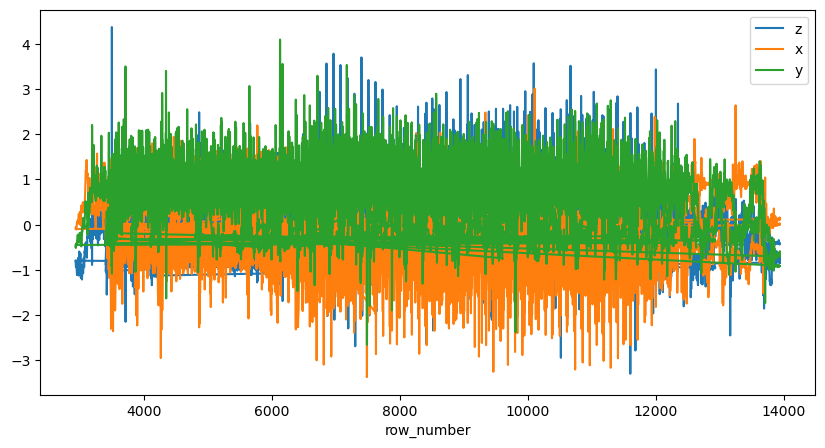

In [213]:
df_walk_acc.plot(figsize=(10,5))

<Axes: xlabel='row_number'>

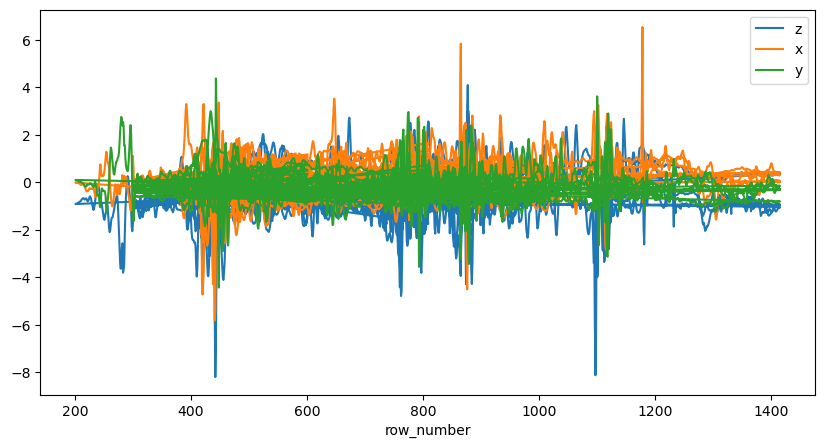

In [214]:
df_fall_acc.plot(figsize=(10,5))

In [215]:
#df_testFall_acc.plot(figsize=(10,5))

<Axes: xlabel='row_number'>

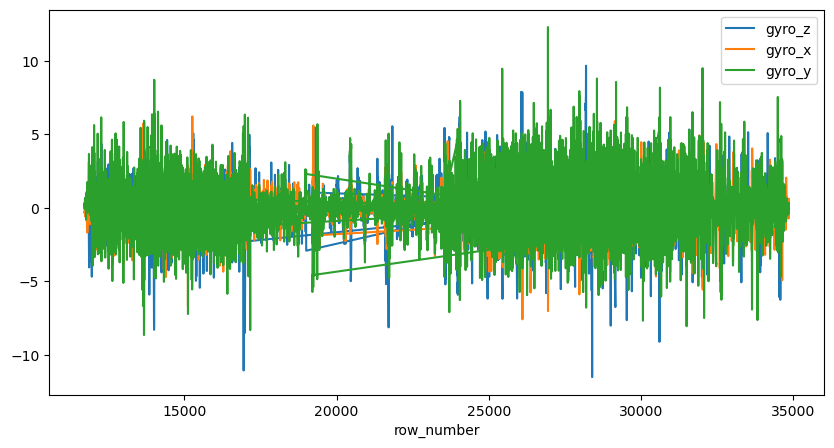

In [216]:
df_walk_gyro.plot(figsize=(10,5))

<Axes: xlabel='row_number'>

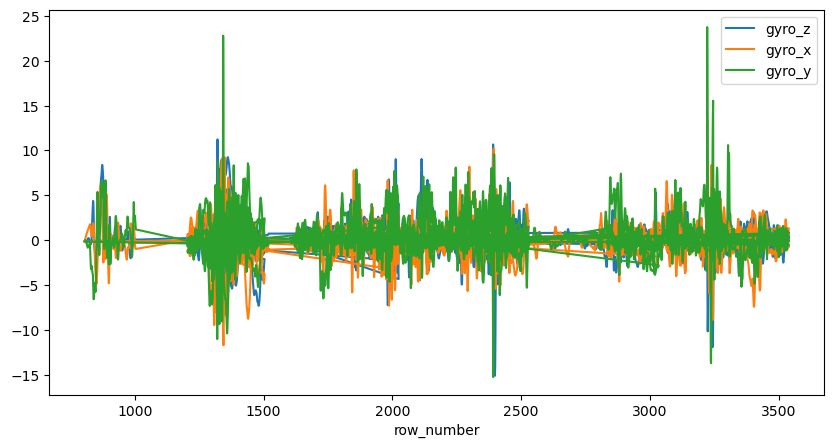

In [217]:
df_fall_gyro.plot(figsize=(10,5))

Vergabe von Labels auf der Basis des Dataframe Ursprungs (Einteilung in Walk und Fall):

-> Verbinden der verschiedenen DataFrames nach Sensoren zu einem kombinierten Dataframe

In [218]:
df_walk_acc['label'] = "walk"
df_fall_acc['label'] = "fall"

df_walk_gyro['label'] = "walk"
df_fall_gyro['label'] = "fall"

df_walk_or['label'] = "walk"
df_fall_or['label'] = "fall"

df_walk_grav['label'] = "walk"  
df_fall_grav['label'] = "fall"


dataframes_walk = [df_walk_gyro, df_walk_or, df_walk_grav]
#df_combined_walk = pd.concat(dataframes_walk, axis=1,on='row_number_walk')
#df_walk_acc.merge(df_walk_gyro, on='row_number')

df_combined_walk = pd.merge(df_walk_acc, df_walk_gyro, on='row_number')
df_combined_fall = pd.merge(df_fall_acc, df_fall_gyro, on='row_number')
###

df_combined_walk = pd.merge(df_combined_walk, df_walk_or, on='row_number')
df_combined_fall = pd.merge(df_combined_fall, df_fall_or, on='row_number')

#df_combined_walk = pd.merge(df_combined_walk, df_walk_grav, on='row_number')
#df_combined_fall = pd.merge(df_combined_fall, df_fall_grav, on='row_number')

Check der kombinierten DataFrames:

In [219]:
df_walk_grav.head()

,grav_z,grav_x,grav_y,label
row_number,,,,
11920,-9.283345,1.252837,-2.901774,walk
11921,-9.277962,1.263886,-2.914171,walk
11922,-9.269165,1.267437,-2.940503,walk
11923,-9.259364,1.245238,-2.980595,walk
11924,-9.247922,1.199737,-3.034294,walk


In [220]:
df_combined_walk

,z,x,y,label_x,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,label
row_number,,,,,,,,,,,,,


In [221]:
#df_combined_walk.describe()
len(df_combined_walk)

0

In [19]:
df_combined_fall.head(-5)

,z,x,y,label_x,gz,gx,gy,label_y
time,,,,,,,,
2023-06-23 12:09:26.726447104,-0.853943,0.055573,-0.325180,fall,0.018702,-0.296939,0.247161,fall
2023-06-23 12:09:26.736413952,-0.817993,0.075912,-0.315323,fall,0.010588,-0.409681,0.247593,fall
2023-06-23 12:09:26.746382080,-0.777313,0.103943,-0.323853,fall,0.041053,-0.578489,0.347036,fall
2023-06-23 12:09:26.756349184,-0.754684,0.120941,-0.336594,fall,0.108765,-0.771343,0.509045,fall
2023-06-23 12:09:26.766316288,-0.758179,0.124817,-0.330475,fall,0.189835,-0.924996,0.663297,fall
...,...,...,...,...,...,...,...,...
2023-05-29 18:18:14.305150720,-1.076965,0.363937,-0.475159,fall,-0.714543,2.400685,-3.465958,fall
2023-05-29 18:18:14.315118848,-1.226120,0.453964,-0.677551,fall,-0.580247,1.536963,-5.076506,fall
2023-05-29 18:18:14.325085952,-1.030090,0.460510,-0.760925,fall,-0.450843,0.769894,-5.294243,fall


Bestimmung der Länge der Datensätze:

In [20]:
df_help = df_combined_walk.reset_index()
print(df_help.iloc[-1,0] - df_help.iloc[0,0])

24 days 17:27:53.304175872


Ausschluss der Spalte "label_x" da redundant: 

In [21]:
df_combined_walk.drop('label_x',axis=1, inplace=True)
df_combined_fall.drop('label_x',axis=1, inplace=True)

Überprüfen der Vollständigkeit des Datensatzes:

In [22]:
laenge = len(df_walk_acc) + len(df_walk_gyro)
print("Doppelte Zeilen in Dataframes, ohne join auf Time:", laenge)
print("Einfache Anzahl an Zeilen, bei richtigem Merge:",len(df_combined_walk))
print("Länge des Merges:", len(df_combined_walk))

Doppelte Zeilen in Dataframes, ohne join auf Time: 146090
Einfache Anzahl an Zeilen, bei richtigem Merge: 60853
Länge des Merges: 60853


Aufteilen der DF's in einzelne Abschnitte mit den Abständen 100 Datenpunkte:
- ToDo: Anpassen der Länge von Sequenzen und deren Auswirkung auf die Modellgüte/ Accuracy

In [23]:
df_combined_walk['id'] = 0
df_combined_fall['id'] = 0

id = 1

var1 = 100
var2 = 100

for i in range(0, len(df_combined_walk)):
    df_combined_walk.iloc[i,7] = id
    

    if i >= var1: 
        var1 = var1 + 100
        id+=1

id +=1

for i in range(0, len(df_combined_fall)):
    
    df_combined_fall.iloc[i,7] = id

    if i >= var2: 
        var2 = var2 + 100
        id+=1  

In [24]:
df_combined_walk

,z,x,y,gz,gx,gy,label_y,id
time,,,,,,,,
2023-05-29 18:29:11.091994624,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,1
2023-05-29 18:29:11.101962240,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,1
2023-05-29 18:29:11.111930368,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,1
2023-05-29 18:29:11.121899264,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,1
2023-05-29 18:29:11.131867392,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,1
...,...,...,...,...,...,...,...,...
2023-06-23 11:57:04.356075264,-1.127563,-0.665344,-0.010620,0.723139,0.435555,0.885818,walk,609
2023-06-23 11:57:04.366099456,-1.115173,-0.743195,-0.009674,0.476397,0.617936,0.918643,walk,609
2023-06-23 11:57:04.376123136,-1.076569,-0.730469,-0.030258,0.255614,0.788783,0.811859,walk,609


In [25]:
df_combined_fall

,z,x,y,gz,gx,gy,label_y,id
time,,,,,,,,
2023-06-23 12:09:26.726447104,-0.853943,0.055573,-0.325180,0.018702,-0.296939,0.247161,fall,610
2023-06-23 12:09:26.736413952,-0.817993,0.075912,-0.315323,0.010588,-0.409681,0.247593,fall,610
2023-06-23 12:09:26.746382080,-0.777313,0.103943,-0.323853,0.041053,-0.578489,0.347036,fall,610
2023-06-23 12:09:26.756349184,-0.754684,0.120941,-0.336594,0.108765,-0.771343,0.509045,fall,610
2023-06-23 12:09:26.766316288,-0.758179,0.124817,-0.330475,0.189835,-0.924996,0.663297,fall,610
...,...,...,...,...,...,...,...,...
2023-05-29 18:18:14.354990848,-0.647324,0.200012,-0.775787,-0.482918,-0.586219,-1.868836,fall,656
2023-05-29 18:18:14.364957696,-0.549530,0.153900,-0.706955,-0.497110,-0.758007,-0.726838,fall,656
2023-05-29 18:18:14.374925824,-0.617737,0.139297,-0.624939,-0.417602,-0.820484,-0.331780,fall,656


Konkatenieren der verschiedenen Dataframes zu einem gemeinsamen DF:

In [26]:
df_combined = pd.concat([df_combined_walk, df_combined_fall])

In [27]:
df_combined.head(16807)

,z,x,y,gz,gx,gy,label_y,id
time,,,,,,,,
2023-05-29 18:29:11.091994624,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,1
2023-05-29 18:29:11.101962240,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,1
2023-05-29 18:29:11.111930368,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,1
2023-05-29 18:29:11.121899264,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,1
2023-05-29 18:29:11.131867392,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,1
...,...,...,...,...,...,...,...,...
2023-05-29 18:30:50.107187456,-0.079193,-0.352829,0.964813,-0.117943,0.402759,-0.024641,walk,169
2023-05-29 18:30:50.117155584,0.041275,-0.237503,0.816345,0.179756,0.352962,0.002241,walk,169
2023-05-29 18:30:50.127123712,0.121353,-0.156967,0.733505,0.420417,0.316896,0.077187,walk,169


Check auf Nullwerte:

In [28]:
df_combined.isnull().sum()

z          0
x          0
y          0
gz         0
gx         0
gy         0
label_y    0
id         0
dtype: int64

In [29]:
df_combined.reset_index(inplace=True)
df_combined.head()

,time,z,x,y,gz,gx,gy,label_y,id
0,2023-05-29 18:29:11.091994624,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,1
1,2023-05-29 18:29:11.101962240,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,1
2,2023-05-29 18:29:11.111930368,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,1
3,2023-05-29 18:29:11.121899264,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,1
4,2023-05-29 18:29:11.131867392,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,1


In [30]:
df_combined.replace(['walk'],0,inplace=True)
df_combined.replace(['fall'],1,inplace=True)
df_combined.head()

,time,z,x,y,gz,gx,gy,label_y,id
0,2023-05-29 18:29:11.091994624,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,0,1
1,2023-05-29 18:29:11.101962240,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,0,1
2,2023-05-29 18:29:11.111930368,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,0,1
3,2023-05-29 18:29:11.121899264,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,0,1
4,2023-05-29 18:29:11.131867392,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,0,1


Berechnen der extracted_features mit tsfresh: 

from tsfresh import extract_features
extracted_features = extract_features(df_combined, column_id="id",column_sort='time')

Ausgeben der errechneten Features mittels TsFresh:

In [31]:
#extracted_features

In [32]:
labels= df_combined[['id','label_y']]
labels= labels.drop_duplicates()
labels= labels.set_index('id')
y= labels.iloc[:,0]
y.duplicated().sum()

print(y)


id
1      0
2      0
3      0
4      0
5      0
      ..
652    1
653    1
654    1
655    1
656    1
Name: label_y, Length: 656, dtype: int64


ACHTUNG: select_features vs. extract_relevant_features Unterschied ermitteln, Recherche

Features_filtered wird nicht weiter benutzt

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
#test
impute(extracted_features)
features_filtered = select_features(extracted_features,y)

In [33]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(df_combined,y,
                                                     column_id='id', column_sort='time')

Feature Extraction:   0%|          | 0/10 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 10/10 [05:12<00:00, 31.25s/it]


In [34]:
p= ts.feature_selection.relevance.calculate_relevance_table(features_filtered_direct, y, ml_task='classification')
df_p100= p.iloc[111:311,:]
df_tolist= df_p100['feature'].tolist()

In [35]:
df_tolist

['z__root_mean_square',
 'z__abs_energy',
 'z__range_count__max_1__min_-1',
 'y__quantile__q_0.1',
 'y__quantile__q_0.2',
 'z__number_crossing_m__m_-1',
 'z__fft_coefficient__attr_"abs"__coeff_0',
 'y__quantile__q_0.3',
 'y__minimum',
 'y__quantile__q_0.4',
 'y__fft_coefficient__attr_"angle"__coeff_0',
 'y__median',
 'y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min"',
 'y__mean',
 'y__c3__lag_3',
 'y__fft_coefficient__attr_"real"__coeff_0',
 'y__sum_values',
 'y__count_below__t_0',
 'y__count_above__t_0',
 'y__range_count__max_1000000000000.0__min_0',
 'y__quantile__q_0.6',
 'z__quantile__q_0.1',
 'y__range_count__max_0__min_-1000000000000.0',
 'y__c3__lag_2',
 'y__c3__lag_1',
 'y__quantile__q_0.7',
 'x__fft_coefficient__attr_"angle"__coeff_0',
 'z__mean_n_absolute_max__number_of_maxima_7',
 'y__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"min"',
 'x__maximum',
 'y__number_crossing_m__m_-1',
 'y__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"mean"

features_filtered.columns

x_features=features_filtered_direct.iloc[:,111:]

In [36]:
array= np.asarray(df_tolist)
x_features= features_filtered_direct[[df_tolist[0]]]

list=[]
list.append(x_features.columns)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_features, y, test_size=0.30, random_state=101)

In [38]:
y_test

id
75     0
391    0
558    0
284    0
242    0
      ..
342    0
63     0
593    0
58     0
475    0
Name: label_y, Length: 197, dtype: int64

In [39]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [40]:
#Test via Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[178   7]
 [  8   4]]


In [41]:
#Test via Accuracy & Classification Report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9238578680203046
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       185
           1       0.36      0.33      0.35        12

    accuracy                           0.92       197
   macro avg       0.66      0.65      0.65       197
weighted avg       0.92      0.92      0.92       197



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
#randomforest
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

#Test via Konfusionsmatrix
dm = confusion_matrix(y_test, y_pred)
print(dm)

[[179   6]
 [  9   3]]


In [44]:
#Test via Accuracy & Classification Report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9238578680203046
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       185
           1       0.33      0.25      0.29        12

    accuracy                           0.92       197
   macro avg       0.64      0.61      0.62       197
weighted avg       0.91      0.92      0.92       197



Speichern des Modells mit Pickle:

In [45]:
import pickle 
#lol
knnPickle = open('knnpickle_file', 'wb')
rfPickle = open('rfpickle_file', 'wb')
featuresList = open('featuresList_file', 'wb')

pickle.dump(knn,knnPickle)
pickle.dump(rf, rfPickle)
pickle.dump(df_tolist,featuresList)

knnPickle.close()
rfPickle.close()
featuresList.close()